In [19]:
# Jonathan Plavnik, CMOR220, Fall 2025, Project 8
# project8_shape_analysis.ipynb
# The goal of this problem is to examine the similarities between ‘noisy’ shapes
# defined by altering the functions cos(x),sin(x), x2, x from 0 to π. Generate
# 40 training curves that will serve as clusters, then test 100 curves modified
# randomly to see if they are clustered correctly
# Last modified: November 11, 2025

# Imports
import matplotlib.pyplot as plt
import numpy as np
import math

In [20]:
# generate graphs


# generate initial curves
cos = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [math.cos(x) for x in np.arange(0, math.pi, 0.02)]
])

sin = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [math.sin(x) for x in np.arange(0, math.pi, 0.02)]
])

squared = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [x**2 for x in np.arange(0, math.pi, 0.02)]
])

linear = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [x for x in np.arange(0, math.pi, 0.02)]
])


# initialize lists for storing 10 curves of each one
num_curves = 10
cos_curves = []
sin_curves = []
squared_curves = []
linear_curves = []

# add random changes to all 40 curves
for i in range(num_curves):
  noise = 0.05 * np.random.randn(2, cos.shape[1])
  cos_new = cos + noise
  cos_curves.append(cos_new)

  noise = 0.05 * np.random.randn(2, sin.shape[1])
  sin_new = sin + noise
  sin_curves.append(sin_new)

  noise = 0.05 * np.random.randn(2, squared.shape[1])
  squared_new = squared + noise
  squared_curves.append(squared_new)

  noise = 0.05 * np.random.randn(2, linear.shape[1])
  linear_new = linear + noise
  linear_curves.append(linear_new)



In [21]:
# Helper functions
def position(M): # Center curve at origin
    # list of inputs: curve M
    # list of outputs: curve M with all (x,y) pairs shifted by centers distance from origin
    return M - np.mean(M, axis = 1, keepdims=True)

def scale(M): # Force Frobenius norm to 1
    # list of inputs: curve M
    # list of outputs: curve M normalized with norm of 0
    n = np.linalg.norm(M, 'fro')
    return M / n

def distance(curve1, curve2):
    # list of inputs: curve 1 and curve 2
    # list of outputs: distance between curves 1 and 2
    norm1 = scale(position(curve1)) # Scale call AFTER position reset!
    norm2 = scale(position(curve2))
    u, _, vT = np.linalg.svd(norm1 @ norm2.T) # SVD
    rot = u @ vT if np.linalg.det(u @ vT) >= 0 else u @ np.diag([1, -1]) @ vT # 2 pathways for rotation matrix
    return np.linalg.norm(norm1 - rot @ norm2, 'fro') # Computed distance formula

def pairwise_distance(curves):
    # list of inputs: curves, array of all curves
    # list of outputs: matrix showing pairwise distance between all curves
    p = curves.shape[0] # Correctly get the number of curves (40)
    D = np.zeros((p, p))
    for i in range(p):
        for j in range(i, p):
            dist = distance(curves[i, :, :], curves[j, :, :]) # Correct slicing for individual curves (2, 158)
            D[i, j] = D[j, i] = dist
    return D

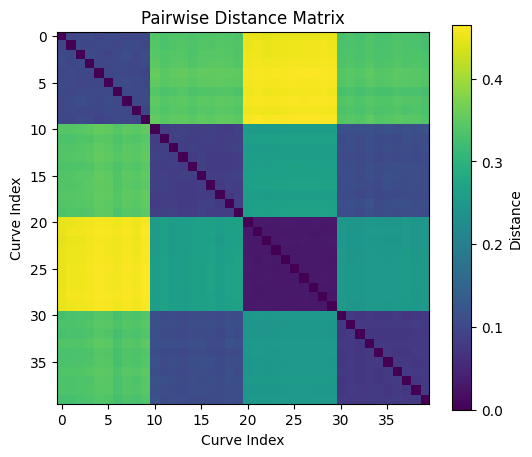

In [22]:
# plot pairwise distance matrix

# combine all curves into one array which will contain all 40
all_curves = sin_curves + cos_curves + squared_curves + linear_curves
all_curves = np.array(all_curves)
distances = pairwise_distance(all_curves)

# plotting instructions
plt.figure(figsize = (6, 5))
plt.imshow(distances)
plt.colorbar(label = 'Distance')
plt.title('Pairwise Distance Matrix')
plt.xlabel('Curve Index')
plt.ylabel('Curve Index')
plt.show()

In [23]:
# training data completed, test data below

In [24]:

# generate initial curves
cos = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [math.cos(x) for x in np.arange(0, math.pi, 0.02)]
])

sin = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [math.sin(x) for x in np.arange(0, math.pi, 0.02)]
])

squared = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [x**2 for x in np.arange(0, math.pi, 0.02)]
])

linear = np.array([
    [x for x in np.arange(0, math.pi, 0.02)],
    [x for x in np.arange(0, math.pi, 0.02)]
])


# initialize lists for storing 10 curves of each one
num_curves = 25
cos_curves = []
sin_curves = []
squared_curves = []
linear_curves = []

# add random changes to all 40 curves
for i in range(num_curves):
  noise = 0.05 * np.random.randn(2, cos.shape[1])
  cos_new = cos + noise
  cos_curves.append(cos_new)

  noise = 0.05 * np.random.randn(2, sin.shape[1])
  sin_new = sin + noise
  sin_curves.append(sin_new)

  noise = 0.05 * np.random.randn(2, squared.shape[1])
  squared_new = squared + noise
  squared_curves.append(squared_new)

  noise = 0.05 * np.random.randn(2, linear.shape[1])
  linear_new = linear + noise
  linear_curves.append(linear_new)

In [33]:
import numpy as np
# combine all curves into one array which will contain all 100
test_curves = sin_curves + cos_curves + squared_curves + linear_curves
test_curves = np.array(test_curves)

# this is the classification they are supposed to be
correct_classification = [int(i/25) + 1 for i in range(0,100)]
classification_score = 0


# run over all 100 test curves to see which curve the resemble most closely in
# which cluster, then compare against the cluster they should be in and if so,
# add one to total
for i in range(len(test_curves)):
  current_curve = test_curves[i]
  curve_distances = []
  for j in range(len(all_curves)):
    curve_distances.append(distance(current_curve, all_curves[j]))
  min_index = np.argmin(curve_distances);
  if(int(i/25) == int(min_index/10)): # Corrected division from 40 to 10
    classification_score += 1

# we are looking for a score of 100%
print("Classification: " + str(classification_score) +  "%")

Classification: 100%
